In [1]:
%load_ext lab_black
%load_ext autotime
import pandas as pd
import numpy as np
import drnb as nb

time: 4.79 s (started: 2022-09-04 16:24:59 -07:00)


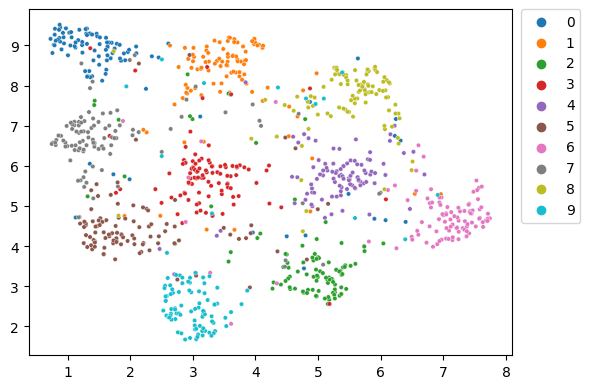

time: 7.8 s (started: 2022-09-04 16:25:09 -07:00)


In [2]:
s1k_umap = nb.embed_data("s1k", method="umap")

UMAP parameters:

* `n_neighbors=15`
* `metric="euclidean"`
* `metric_kwds=None`
* `n_epochs=None`: set to `500` if `N < 10000`, `200` otherwise. If `densmap=True` then an extra `200` epochs are added.
* `learning_rate=1.0`
* `init="spectral"`: one of `"spectral"` (spectral embedding like a noisy Laplacian Eigenmap) or `"random"` (uniform random sampling between -10 and 10).
* `min_dist=0.1`
* `spread=1.0`
* `n_jobs=-1`
* `set_op_mix_ratio=1.0`
* `local_connectivity=1.0`
* `repulsion_strength=1.0`
* `negative_sample_rate=5`
* `a=None`
* `b=None`
* `random_state=None`
* `force_approximation_algorithm=False`: if `True`, then use pynndescent's approximate nearest neighbors even for "small" (`N < 4096`) datasets.
* `verbose=False`
* `unique=False`: if `True` then identical points in the input space are represented as one point in the output space (which can avoids some trouble with duplicates having zero distance from each other).
* `densmap=False`: if `True` then use the `densmap` method.
* `dens_lambda=2.0`: `densmap` parameter.
* `dens_frac=0.3`: `densmap` parameter.
* `dens_var_shift=0.1`: `densmap` parameter.
* `output_dens=False`: `densmap` parameter: if `True`, export the input and output radii
* `tqdm_kwds=None`: a dict containing configuration for the progress bar when `verbose=True`. Doesn't seem to work great by default in a notebook, so you can turn it off with `{"disable": True}`.


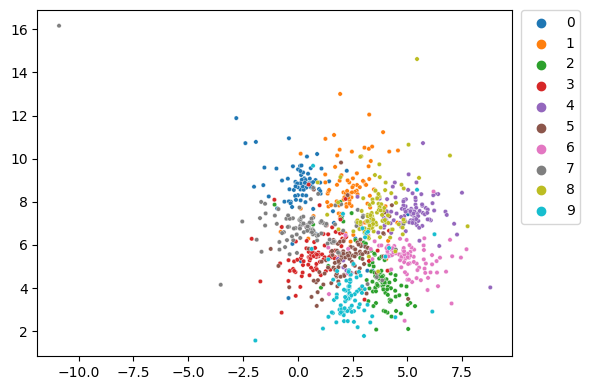

time: 22.9 s (started: 2022-09-04 16:25:37 -07:00)


In [3]:
s1k_densmap = nb.embed_data(
    "s1k",
    method=nb.embedder("umap", params=dict(densmap=True, output_dens=True)),
    export=("csv", dict(export_dir="dmap", verbose=True)),
)

UMAP(n_neighbors=50, random_state=42, unique=True, verbose=True)
Unique=True -> Number of data points reduced from  150  to  149
Most common duplicate is 101  with a count of  2
Sun Sep  4 16:26:22 2022 Construct fuzzy simplicial set
Sun Sep  4 16:26:22 2022 Finding Nearest Neighbors
Sun Sep  4 16:26:22 2022 Finished Nearest Neighbor Search
Sun Sep  4 16:26:22 2022 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

Sun Sep  4 16:26:23 2022 Finished embedding


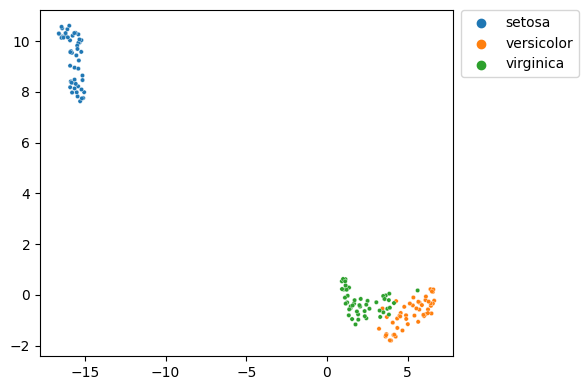

time: 1.28 s (started: 2022-09-04 16:26:22 -07:00)


In [4]:
iris_umap = nb.embed_data(
    "iris",
    method=nb.embedder(
        "umap",
        params=dict(
            unique=True,
            random_state=42,
            n_neighbors=50,
            verbose=True,
        ),
    ),
)

UMAP(n_neighbors=50, random_state=42, verbose=True)
Sun Sep  4 16:26:44 2022 Construct fuzzy simplicial set
Sun Sep  4 16:26:44 2022 Finding Nearest Neighbors
Sun Sep  4 16:26:44 2022 Finished Nearest Neighbor Search
Sun Sep  4 16:26:44 2022 Construct embedding
Sun Sep  4 16:26:44 2022 Finished embedding


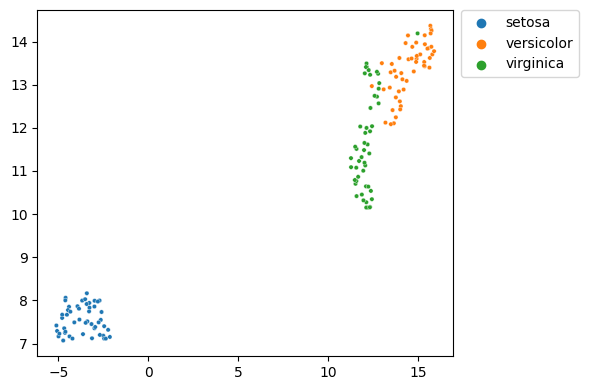

time: 1.1 s (started: 2022-09-04 16:26:44 -07:00)


In [5]:
iris_umap = nb.embed_data(
    "iris",
    method=nb.embedder(
        "umap",
        params=dict(
            unique=False,
            random_state=42,
            n_neighbors=50,
            verbose=True,
            tqdm_kwds={"disable": True},
            init="spectral",
        ),
    ),
)